In [1]:
## Import required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
## Load the data
data = pd.read_csv("iris.csv")
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## Dimensions of Dataset
data.shape

(150, 5)

In [4]:
## Peek at the Data
data.head(20)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
## Statistical Summary
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
## Class Distribution
data.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

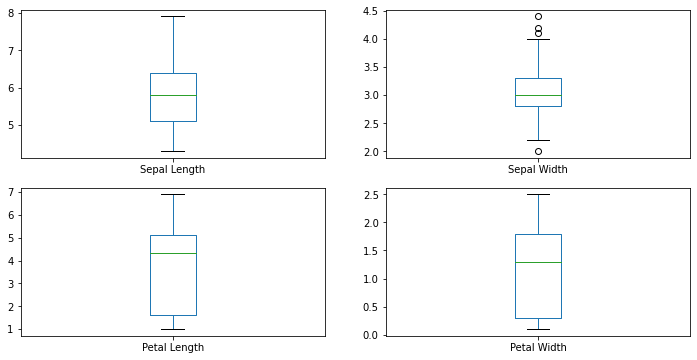

In [7]:
## Univariate Plots
data.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,6))
pyplot.show()

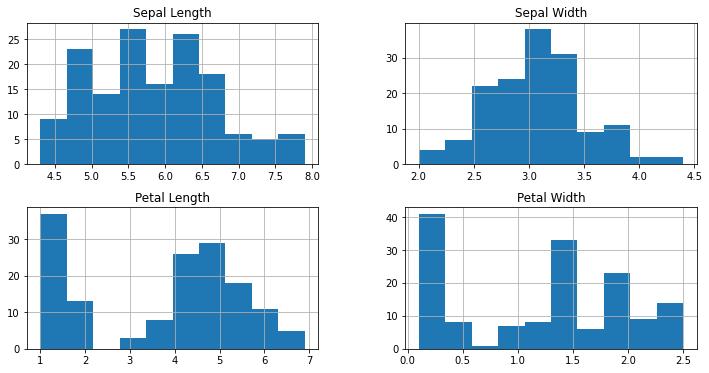

In [8]:
data.hist(figsize=(12,6))
pyplot.show()

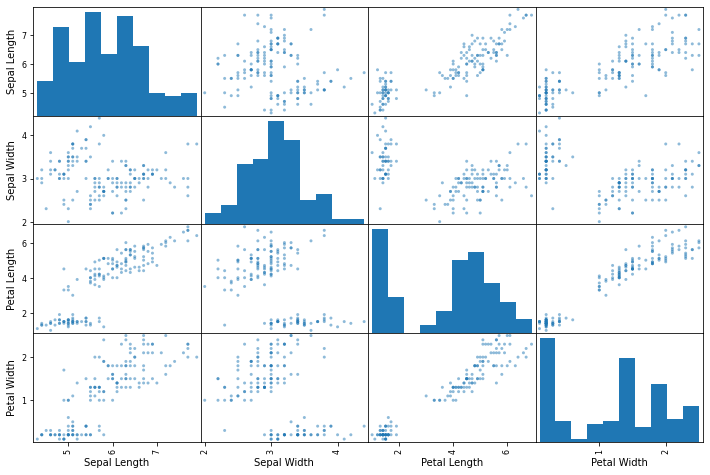

In [9]:
## Multivariate Plots
scatter_matrix(data, figsize=(12,8))
pyplot.show()

In [33]:
## Create a Validation Dataset
X,y = data.values[:,:-1],data.values[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

We will use 10 fold cross validation to estimate accuracy

In [34]:
## Build Models
models = [("LR",LogisticRegression()),("LDA",LinearDiscriminantAnalysis()),("KNN",KNeighborsClassifier()),
         ("CART",DecisionTreeClassifier()),("NB",GaussianNB()),("SVM",SVC())]
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
    results.append(scores)
    names.append(name)
    print("%s : %f (%f)" %(name,np.mean(scores),np.std(scores)))

C:\Users\badboy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\badboy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LR : 0.983333 (0.033333)
LDA : 0.975000 (0.038188)
KNN : 0.983333 (0.033333)
CART : 0.958333 (0.076830)
NB : 0.966667 (0.040825)
SVM : 0.983333 (0.033333)


#### Observation: LogisticRegression, KNN, SVM are best performing on the training dataset

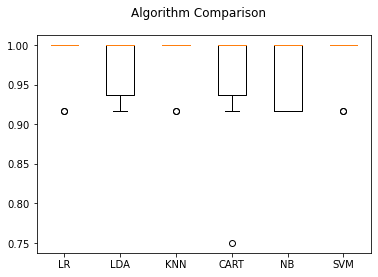

In [35]:
## Algorithm Comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [39]:
## Make Predictions
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.866667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


C:\Users\badboy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
## Make Predictions
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.900000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [41]:
## Make Predictions
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.866667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


###### Observation: KNN is best performing on the validation dataset among LR, KNN, and SVM

#### Performing feature selection, Repeating the steps like seperating the validation data, building models, comparing their performance, choosing best model among them, finally making predictions on validation dataset 

In [14]:
data.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


In [45]:
#### Petal Length and Petal Width are highly correlated. Hence removing one among them.
df = data.drop(["Petal Length"],axis=1)
df.head()

,Sepal Length,Sepal Width,Petal Width,Species
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa


In [46]:
## Create a Validation Dataset
X,y = df.values[:,:-1],df.values[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [47]:
## Build Models
models = [("LR",LogisticRegression()),("LDA",LinearDiscriminantAnalysis()),("KNN",KNeighborsClassifier()),
         ("CART",DecisionTreeClassifier()),("NB",GaussianNB()),("SVM",SVC())]
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
    results.append(scores)
    names.append(name)
    print("%s : %f (%f)" %(name,np.mean(scores),np.std(scores)))

LR : 0.958333 (0.067185)
LDA : 0.983333 (0.033333)
KNN : 0.966667 (0.040825)
CART : 0.958333 (0.055902)
NB : 0.975000 (0.038188)
SVM : 0.966667 (0.055277)


##### Observation: LDA is best performing followed by NB, KNN and SVM

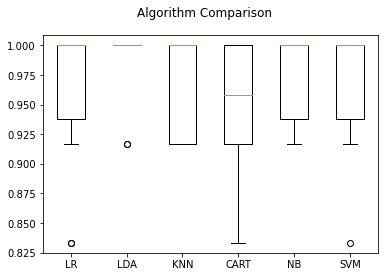

In [26]:
## Algorithm Comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [43]:
## Make Predictions
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predictions = lda.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.966667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [49]:
## Make Predictions
nb = GaussianNB()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.800000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      0.67      0.73        12
 Iris-virginica       0.69      0.82      0.75        11

       accuracy                           0.80        30
      macro avg       0.83      0.83      0.83        30
   weighted avg       0.81      0.80      0.80        30

[[7 0 0]
 [0 8 4]
 [0 2 9]]


In [50]:
## Make Predictions
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.933333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

[[ 7  0  0]
 [ 0 12  0]
 [ 0  2  9]]


In [52]:
## Make Predictions
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
print("Accuracy:%f" %accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy:0.833333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.77      0.83      0.80        12
 Iris-virginica       0.80      0.73      0.76        11

       accuracy                           0.83        30
      macro avg       0.86      0.85      0.85        30
   weighted avg       0.83      0.83      0.83        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  3  8]]


##### Observation: Linear Discriminant Analysis is making more accurate predictions on unseen data or validation data. Hence, this is the final model